## Introdução
Um dos algoritmos mais robustos e eficazes tanto para tarefas de classificação (linear ou não linear), quanto de regressão, é o *Support Vector Machine* (SVM). Trata-se um algoritmo supervisionado, desenvolvido na década de 60 e refinado ao longo dos anos, ganhando popularidade significativa na década de 1990 devido a avanços no campo do aprendizado de máquina, especificamente em técnicas de *kernel* que permitiram a sua aplicação a conjuntos de dados não lineares. 

### SVM para classificação
SVMs são particularmente adequados para classificação de conjuntos de dados complexos de pequeno ou médio porte. O objetivo principal do SVM é encontrar um hiperplano que melhor separe as classes de dados em um espaço multidimensional. Um hiperplano é essencialmente uma generalização de uma linha (2D) ou plano (3D) para dimensões mais altas.

Para entender melhor esses conceitos, vamos explorar o SVM no banco de dados [Iris](https://archive.ics.uci.edu/dataset/53/iris).

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Carregar os dados
data = load_iris()

# Criar um dataframe pandas
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Exibir as primeiras linhas do DataFrame para verificação
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Por simplificação, vamos usar somente *petal length* e *petal width* como recursos e como alvos as classes *setosa* e *versicolor*.

In [23]:
X = df.loc[:, ['petal length (cm)', 'petal width (cm)']]  # petal length, petal width
y = df["target"]

setosa_or_versicolor = (y == 0) | (y == 1) # setosa, versicolor
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Treinar o modelo SVM

In [24]:
from sklearn.svm import SVC

# Classificador SVM
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(kernel='linear')

Podemos ver as ideias básicas do SVM na figura abaixo. Nesse caso, temos duas classes que podem ser facilmente separadas com uma linha reta (elas são linearmente separáveis). A linha sólida no gráfico representa o limite de decisão de um classificador SVM; esta linha não apenas separa as duas classes, mas também fica o mais longe possível das instâncias de treinamento mais próximas, a partir da construção de uma margem de separação, representada pelas linhas tracejadas paralelas entre as classes. Dessa forma, o limite de decisão é totalmente determinado (ou “suportado”) pelas instâncias localizadas na beira das margens, as quais são chamadas de vetores de suporte (instâncias circuladas na Figura).

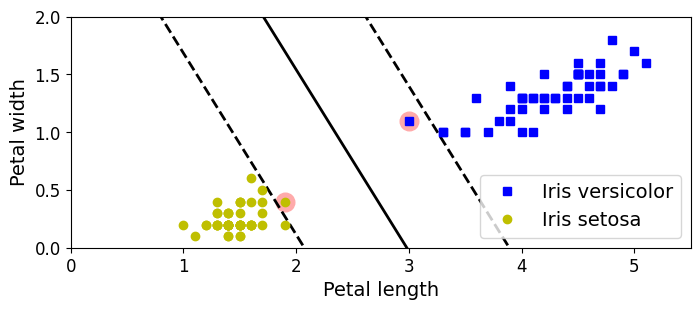

In [26]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(figsize=(8,3), sharey=True)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### Fundamentos Matemáticos do SVM
Dessa modo, o objetivo do algoritmo SVM é encontrar o hiperplano que maximiza a margem entre as classes de dados. Esta margem é definida como a distância entre as linhas paralelas mais próximas dos pontos de dados em cada classe. Matematicamente, um hiperplano é definido como um subespaço de dimensão $n-1$ em um espaço de $n$ dimensões, e pode ser descrito pela equação:

$\mathbf{w} \cdot \mathbf{x} - b = 0$

onde, $\mathbf{w}$ representa o vetor normal ao hiperplano, $\mathbf{x}$ é um vetor que representa um ponto no espaço, e $b$ é o viés, que ajusta a distância do hiperplano em relação à origem. Juntos, $\mathbf{w}$ e $b$ definem a posição e orientação do hiperplano no espaço multidimensional.

A tarefa de otimização realizada pelo SVM busca maximizar essa margem entre as classes. Isso é equivalente a minimizar $∥\mathbf{w}∥$, sujeito a certas restrições que garantem que os dados de ambas as classes sejam corretamente classificados.